In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime

%matplotlib inline

### Переместим данные из [Access Log серверов NASA](https://yadi.sk/d/JPx8Chjc6hLHNg) в pandas DataFrame

In [37]:
ar=[]
with open('access_log_Jul95.log') as file:
    for line in file:
        spl = line.split()
        if len(spl)>1:
            Url = ' '.join(spl[6:-2])
            new_line=[spl[0],spl[3][1:],Url[:Url.find('HTTP/1.0')],spl[-2],spl[-1]]
            ar.append(new_line)

In [38]:
df = pd.DataFrame(ar,columns=['Name','Time','URL','Code','Size'])

In [39]:
df.head()

,Name,Time,URL,Code,Size
0,199.72.81.55,01/Jul/1995:00:00:01,/history/apollo/,200,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,/shuttle/countdown/,200,3985
2,199.120.110.21,01/Jul/1995:00:00:09,/shuttle/missions/sts-73/mission-sts-73.html,200,4085
3,burger.letters.com,01/Jul/1995:00:00:11,/shuttle/countdown/liftoff.html,304,0
4,199.120.110.21,01/Jul/1995:00:00:11,/shuttle/missions/sts-73/sts-73-patch-small.gif,200,4179


### Посчитаем количество обращений к каждому урлу и найдем топ-15 самых посещаемых урлов

In [43]:
df.groupby('URL').URL.count().sort_values(ascending=False)

URL
/images/NASA-logosmall.gif                              111086
/images/KSC-logosmall.gif                                89529
/images/MOSAIC-logosmall.gif                             60299
/images/USA-logosmall.gif                                59844
/images/WORLD-logosmall.gif                              59324
/images/ksclogo-medium.gif                               58615
/images/launch-logo.gif                                  40841
/shuttle/countdown/                                      40241
/ksc.html                                                40043
/images/ksclogosmall.gif                                 33555
/                                                        32660
/history/apollo/images/apollo-logo1.gif                  31052
/shuttle/missions/missions.html                          24826
/htbin/cdt_main.pl                                       22599
/shuttle/countdown/count.gif                             22189
/shuttle/countdown/liftoff.html                    

In [44]:
df.groupby('URL').URL.count().sort_values(ascending=False).head(15)

URL
/images/NASA-logosmall.gif                  111086
/images/KSC-logosmall.gif                    89529
/images/MOSAIC-logosmall.gif                 60299
/images/USA-logosmall.gif                    59844
/images/WORLD-logosmall.gif                  59324
/images/ksclogo-medium.gif                   58615
/images/launch-logo.gif                      40841
/shuttle/countdown/                          40241
/ksc.html                                    40043
/images/ksclogosmall.gif                     33555
/                                            32660
/history/apollo/images/apollo-logo1.gif      31052
/shuttle/missions/missions.html              24826
/htbin/cdt_main.pl                           22599
/shuttle/countdown/count.gif                 22189
Name: URL, dtype: int64

### Посчитаем число запросов в секунду

In [45]:
times = df.groupby('Time').Time.count()
times

Time
01/Jul/1995:00:00:01    1
01/Jul/1995:00:00:06    1
01/Jul/1995:00:00:09    1
01/Jul/1995:00:00:11    2
01/Jul/1995:00:00:12    3
01/Jul/1995:00:00:13    2
01/Jul/1995:00:00:14    3
01/Jul/1995:00:00:15    3
01/Jul/1995:00:00:17    2
01/Jul/1995:00:00:18    1
01/Jul/1995:00:00:19    2
01/Jul/1995:00:00:24    1
01/Jul/1995:00:00:25    1
01/Jul/1995:00:00:27    1
01/Jul/1995:00:00:29    1
01/Jul/1995:00:00:33    1
01/Jul/1995:00:00:35    1
01/Jul/1995:00:00:37    1
01/Jul/1995:00:00:38    1
01/Jul/1995:00:00:40    1
01/Jul/1995:00:00:41    5
01/Jul/1995:00:00:43    1
01/Jul/1995:00:00:44    1
01/Jul/1995:00:00:50    1
01/Jul/1995:00:00:54    1
01/Jul/1995:00:00:58    1
01/Jul/1995:00:00:59    2
01/Jul/1995:00:01:02    1
01/Jul/1995:00:01:04    3
01/Jul/1995:00:01:05    1
                       ..
28/Jul/1995:13:31:46    4
28/Jul/1995:13:31:47    3
28/Jul/1995:13:31:49    6
28/Jul/1995:13:31:50    5
28/Jul/1995:13:31:51    3
28/Jul/1995:13:31:52    2
28/Jul/1995:13:31:53    2
28/Jul/

### Построим график числа запросов в секунду

In [59]:
x=times.index.values
y=times.values

In [60]:
datetime_array = [datetime.datetime.strptime(n, "%d/Jul/%Y:%H:%M:%S") for n in x] #перевод времени в формат datetime
mpl_dates = dates.date2num(datetime_array) #перевод времени в формат matplotlib.dates

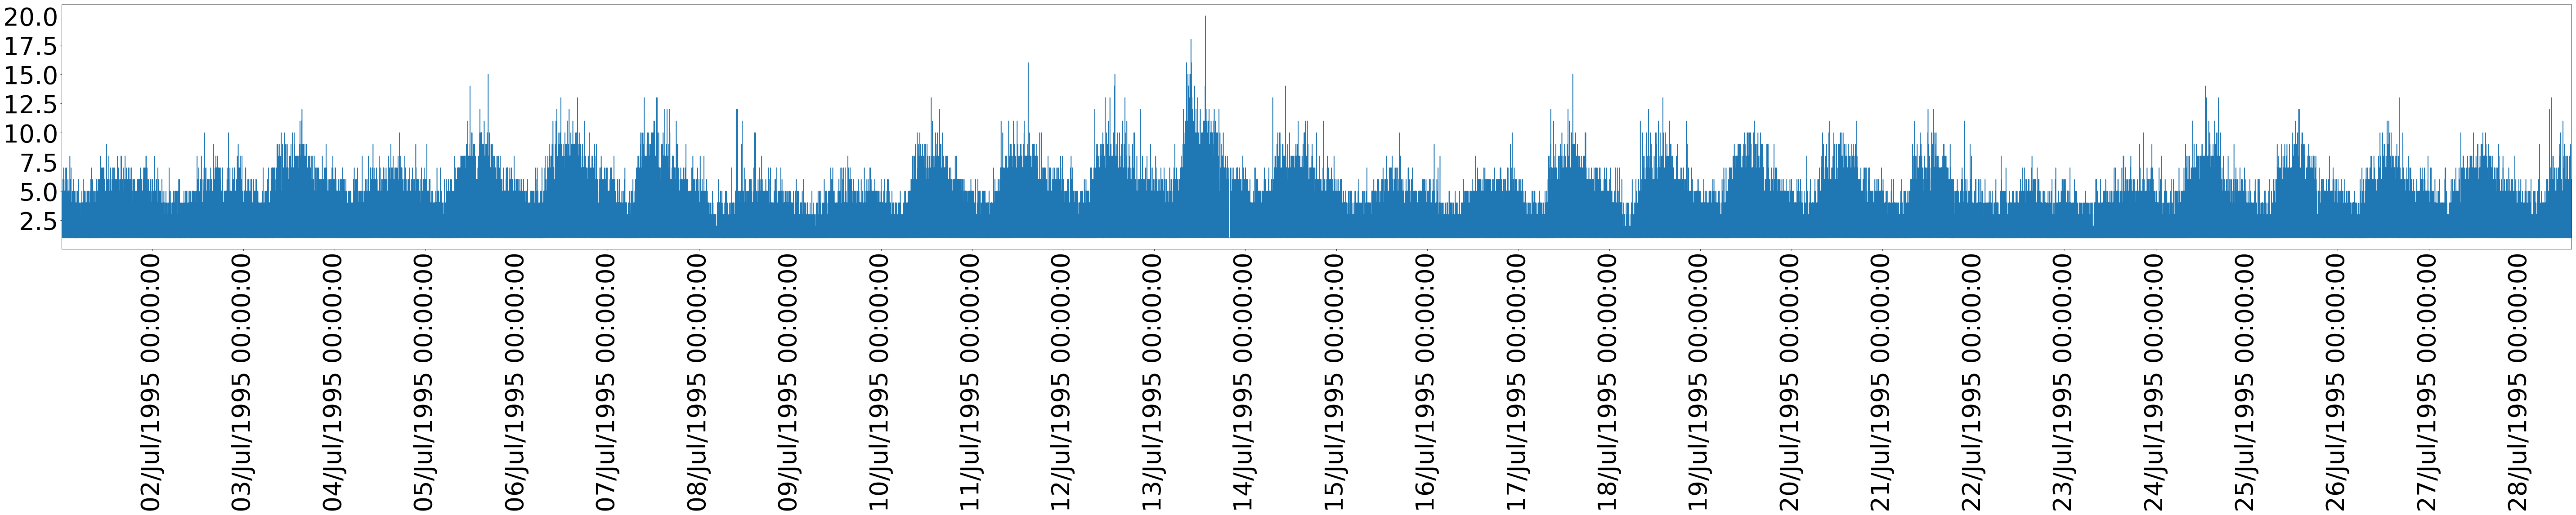

In [61]:
fig = plt.figure(figsize=(100,10))
axes = plt.gca()
plt.plot(mpl_dates,y)

for label in (axes.get_xticklabels() + axes.get_yticklabels()): 
    label.set_fontsize(55)

form = dates.DateFormatter('%d/Jul/1995 %H:%M:%S')

axes.xaxis.set_major_locator(dates.DayLocator())
axes.xaxis.set_major_formatter(form)
axes.set_xlim([min(mpl_dates),max(mpl_dates)])
plt.xticks(rotation='vertical')
plt.show()

### Построим гистограмму распределения размера запросов

In [46]:
df['Size'] = pd.to_numeric(df.replace('-','0')['Size']) #преобразование данных в столбце Size в числовой формат

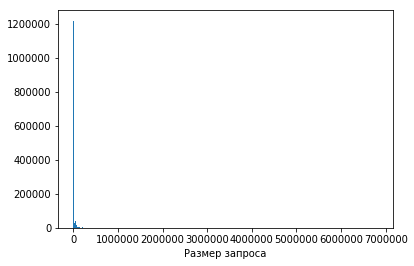

In [56]:
n,b,p = plt.hist(df['Size'].values,1000)
plt.xlabel('Размер запроса')
plt.show()

Как видно из гистограммы, основную часть составляют запросы малых размеров

Рассмотрим отдельно части гистограммы для запросов размером $<100000$ и $>100000$

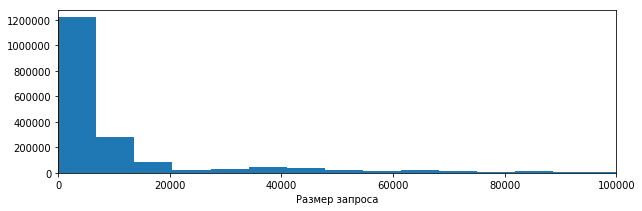

In [57]:
plt.figure(figsize=(10,3))
axes = plt.gca()
axes.set_xlim([0,100000])
n,b,p = plt.hist(df['Size'].values,1000)
plt.xlabel('Размер запроса')
plt.show()

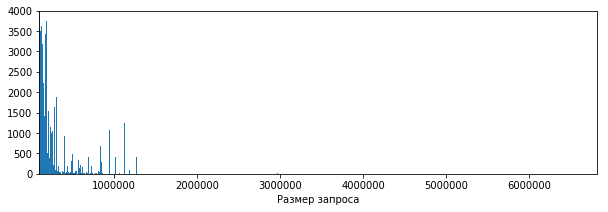

In [58]:
plt.figure(figsize=(10,3))
axes = plt.gca()
axes.set_xlim([100000,max(df['Size'].values)])
axes.set_ylim([0,4000])
n,b,p = plt.hist(df['Size'].values,1000)
plt.xlabel('Размер запроса')
plt.show()